In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from perceptron import Perceptron

In [3]:
df = pd.read_csv("Surgical-deepnet.csv")
# df.head()
# df.tail()
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [4]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [5]:
X = df.drop("complication", axis=1).copy().values
Y = df["complication"].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
boys = ["Ali", "Ahmad", "hosane"]
girls = ["nahal", "nika", "sanaz"]

for boy, girl in zip(boys, girls):
    print(boy, girl)

Ali nahal
Ahmad nika
hosane sanaz


In [7]:
model = Perceptron(0.001, X_train.shape[1], "sigmoid")
L_train, A_train, L_test, A_test = model.fit(X_train, Y_train, X_test, Y_test, 256)

100%|██████████| 256/256 [13:52<00:00,  3.25s/it]


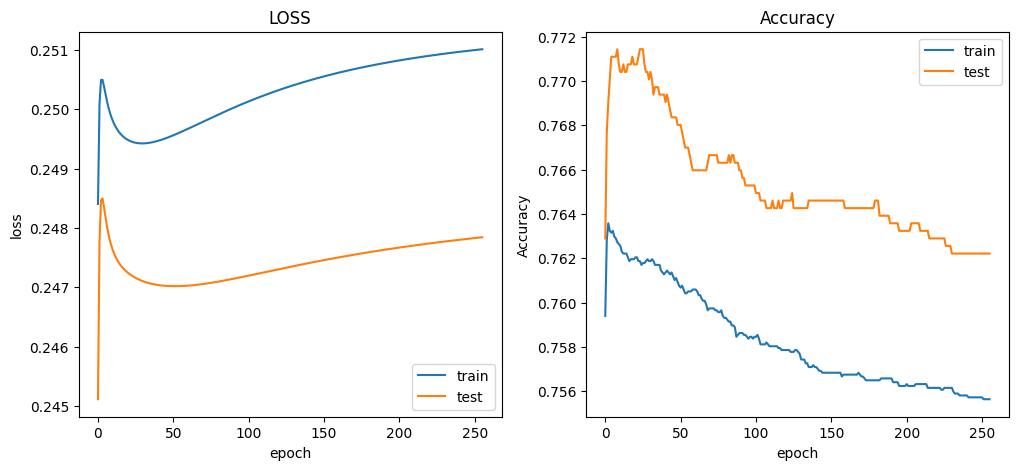

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(L_train)
ax1.plot(L_test)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text('LOSS')

ax2.plot(A_train)
ax2.plot(A_test)
ax2.set_xlabel("epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Accuracy')

plt.show()

In [9]:
model.evaluate(X_test, Y_test)

(0.24784290876802217, 0.7622138708575333)

In [10]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(-1)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[2190,    8],
       [ 688,   41]], dtype=int64)